In [31]:
import numpy as np
import pandas as pd
import hacker_stats
import scipy.stats
import altair as alt
import bokeh.io
import bokeh.plotting

import bootcamp_utils
import hacker_stats

bokeh.io.output_notebook()

Loading BokehJS ...

In [32]:
bee_weight_df = pd.read_csv('data/bee_weight.csv', comment='#')
bee_sperm_df = pd.read_csv('data/bee_sperm.csv', comment='#')

In [33]:
bee_weight_df['ecdf of weight grouped by treatment'] = (bee_weight_df[['Weight', 'Treatment']].
                                                           groupby('Treatment').
                                                           transform(bootcamp_utils.ecdf_y))

In [34]:
bee_weight_df.head()

,Specimen,Colony,Cage,Sample-Nr.,Weight,Treatment,TreatmentNCSS,ecdf of weight grouped by treatment
0,1,3,1,1,292.0,Control,1,0.795
1,2,3,1,2,296.0,Control,1,0.880
2,3,3,1,3,298.0,Control,1,0.895
3,4,3,1,4,290.0,Control,1,0.745
4,5,3,1,5,304.0,Control,1,0.955


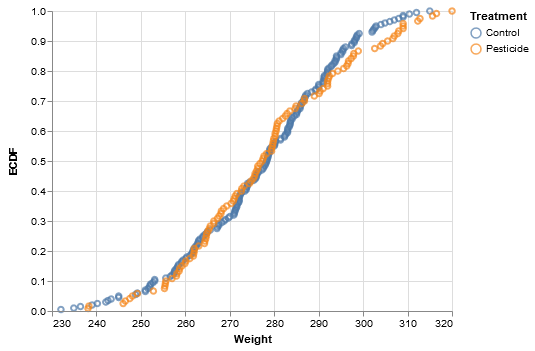

In [44]:
original_weight_ECDF = alt.Chart(bee_weight_df,
         ).mark_point(
         ).encode(
            x=alt.X('Weight:Q', scale=alt.Scale(zero=False)),
            y=alt.Y('ecdf of weight grouped by treatment:Q', title='ECDF'),
            color='Treatment')

original_weight_ECDF

In [48]:
weight_bs_ecdf_df_list = []

control_weights = bee_weight_df.loc[bee_weight_df['Treatment'] == 'Control', 'Weight'].values
pesticide_weights = bee_weight_df.loc[bee_weight_df['Treatment'] == 'Pesticide', 'Weight'].values

for _ in range(100):
    control_bs = np.random.choice(control_weights, len(control_weights))
    pesticide_bs = np.random.choice(pesticide_weights, len(pesticide_weights))
    
    control_x, control_y = bootcamp_utils.ecdf_vals(control_bs)
    pesticide_x, pesticide_y = bootcamp_utils.ecdf_vals(pesticide_bs)
    control_df = pd.DataFrame(data={'Weight': control_x, 'ECDF': control_y, 'Treatment': 'Control'})
    pesticide_df = pd.DataFrame(data={'Weight': pesticide_x, 'ECDF': pesticide_y, 'Treatment': 'Pesticide'})
    
    weight_bs_ecdf_df_list.append(control_df)
    weight_bs_ecdf_df_list.append(pesticide_df)
    
df_bs_weight = pd.concat(weight_bs_ecdf_df_list)

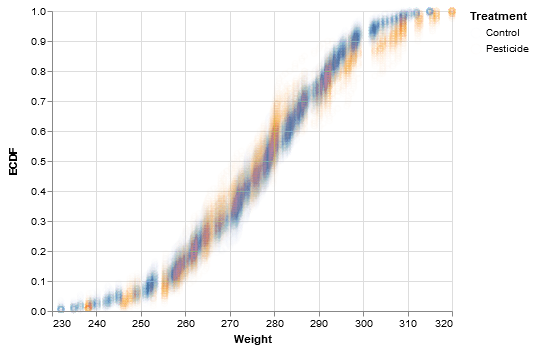

In [51]:
alt.data_transformers.enable('default', max_rows=None)
bootstrap_weights = alt.Chart(df_bs_weight
                             ).mark_point(
                                opacity = 0.01
                             ).encode(
                                x = alt.X('Weight:Q', scale=alt.Scale(zero=False)),
                                y = alt.Y('ECDF:Q'),
                                color='Treatment')

bootstrap_weights


In [36]:
np.mean(bee_weight_df.loc[bee_weight_df['Treatment'] == 'Control', 'Weight'])

277.0563

In [37]:
control_weights = bee_weight_df.loc[bee_weight_df['Treatment'] == 'Control', 'Weight']
control_bs_weight_means = hacker_stats.draw_bs_reps(control_weights, np.mean, 10000)

pesticide_weights = bee_weight_df.loc[bee_weight_df['Treatment'] == 'Pesticide', 'Weight']
pesticide_bs_weight_means = hacker_stats.draw_bs_reps(pesticide_weights, np.mean, 10000)

In [38]:
ecdf_control_weight_xs, ecdf_control_weight_ys = bootcamp_utils.ecdf_vals(control_bs_weight_means)
ecdf_pesticide_weight_xs, ecdf_pesticide_weight_ys = bootcamp_utils.ecdf_vals(pesticide_bs_weight_means)

bs_control_weight_means_df = pd.DataFrame({'mean weight': ecdf_control_weight_xs[::100], 
                                            'ECDF': ecdf_control_weight_ys[::100], 
                                            'Treatment': 'Control'})
bs_pesticide_weight_means_df = pd.DataFrame({'mean weight': ecdf_pesticide_weight_xs[::100], 
                                            'ECDF': ecdf_pesticide_weight_ys[::100],
                                            'Treatment': 'Pesticide'})

ecdf_weight_bs_mean_df = pd.concat([bs_control_weight_means_df, bs_pesticide_weight_means_df])

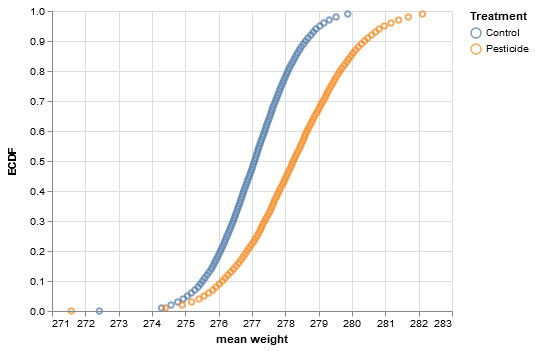

In [43]:
alt.Chart(ecdf_weight_bs_mean_df,
         ).mark_point(
         ).encode(
            x=alt.X('mean weight:Q', scale=alt.Scale(zero=False)),
            y=alt.Y('ECDF:Q', title='ECDF'),
            color='Treatment')

In [40]:
np.percentile(control_bs_weight_means, [2.5, 97.5])

array([274.658625, 279.410395])

In [41]:
np.percentile(pesticide_bs_weight_means, [2.5, 97.5])

array([275.04495833, 281.525     ])